# **Normalization (Feature Scaling)**

**Normalization is a feature scaling technique used to rescale numerical features into a fixed range, usually [0, 1].**

**It is commonly used when:**

**-Features have different scales**

**-Distance-based algorithms are used (KNN, K-Means, SVM)**


# **Some Normalization Technique**

### Min–Max Normalization

The Min–Max normalization formula is:

$$
x_{normalization} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

where:
- $x$ = original value  
- $x_{min}$ = minimum value of the feature  
- $x_{max}$ = maximum value of the feature  
- $x_{norm}$ = normalized value (range: 0 to 1)


****

### Mean Normalization

$$
x_{normalization} = \frac{x - \mu}{x_{max} - x_{min}}
$$

- $x$ = original value  
- $\mu$ = mean of the feature  
- $x_{max}$ = maximum value  
- $x_{min}$ = minimum value

- Resulting values are typically in the range $[-1, 1]$
- Sensitive to outliers
- Useful when data is centered around the mean


****

### MaxAbs Scaling

$$
x_{scaled} = \frac{x}{|x_{max}|}
$$

- $x$ = original value  
- $|x_{max}|$ = maximum absolute value of the feature

- Scales data to the range $[-1, 1]$
- Does NOT shift the data (mean remains unchanged)
- Works well with sparse data


** **

### Robust Scaling

$$
x_{scaled} = \frac{x - \text{median}}{\text{IQR}}
$$

- $\text{IQR} = Q_3 - Q_1$  
- $Q_1$ = 25th percentile  
- $Q_3$ = 75th percentile

- Not affected by outliers
- Suitable for real-world noisy data
- Commonly used before linear models


### 🔹 Feature Scaling Techniques Comparison

| Technique | Formula | Uses | Outlier Resistant | Output Range |
|---------|--------|------|------------------|--------------|
| **Min–Max Normalization** | $x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$ | Min & Max | ❌ No | $[0, 1]$ |
| **Mean Normalization** | $x_{norm} = \frac{x - \mu}{x_{max} - x_{min}}$ | Mean & Range | ❌ No | $\approx [-1, 1]$ |
| **MaxAbs Scaling** | $x_{scaled} = \frac{x}{|x_{max}|}$ | Max Absolute Value | ❌ No | $[-1, 1]$ |
| **Robust Scaling** | $x_{scaled} = \frac{x - \text{median}}{\text{IQR}}$ | Median & IQR | ✅ Yes | Unbounded |



- Min–Max is sensitive to outliers but very common
- Mean normalization centers data around zero
- MaxAbs works well with sparse data
- Robust scaling is best when outliers are present


(NOTE:  Tree-based models do NOT require feature scaling.)


**EXAMPLE OF MIN-MAX NORMALIZATION**

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [4]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

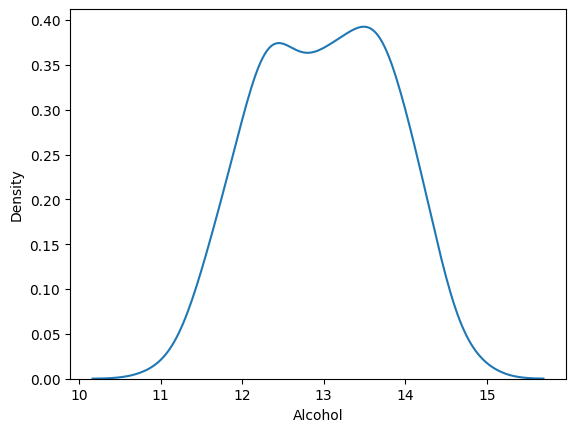

In [7]:
sns.kdeplot(df['Alcohol'])


<Axes: xlabel='Malic acid', ylabel='Density'>

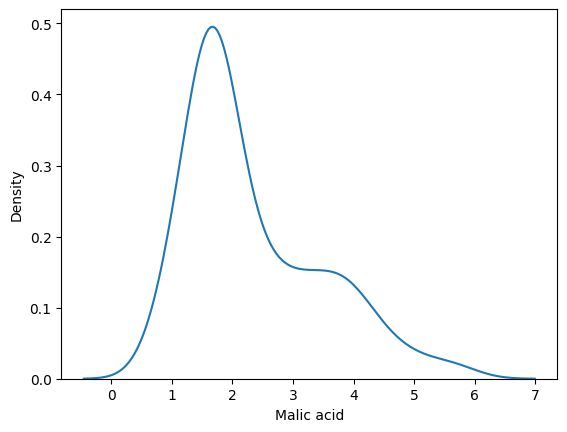

In [8]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

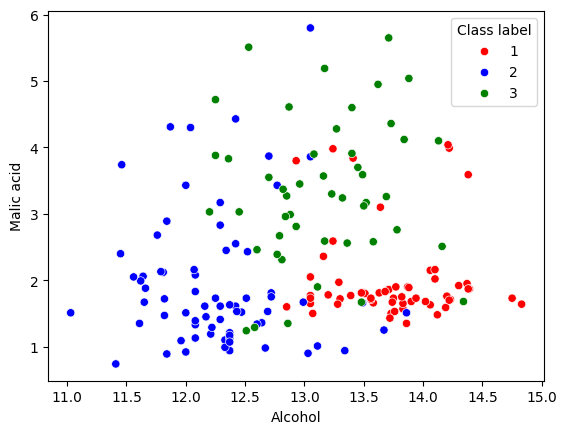

In [10]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(data=df,x='Alcohol',y='Malic acid', hue='Class label',palette=color_dict)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [15]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


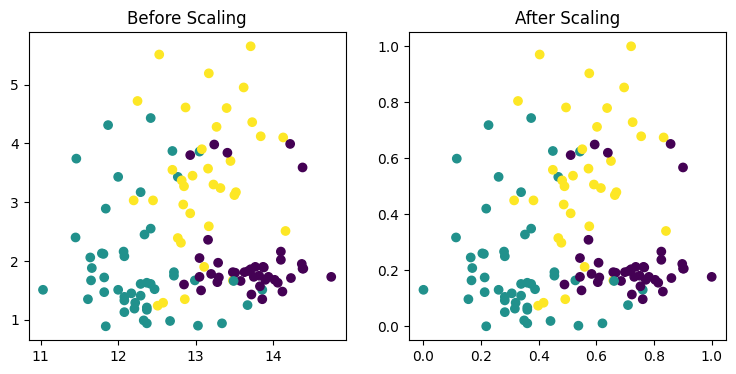

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,4))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

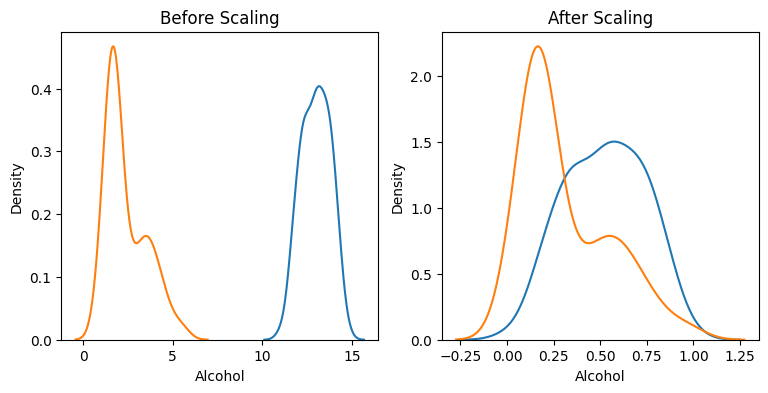

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

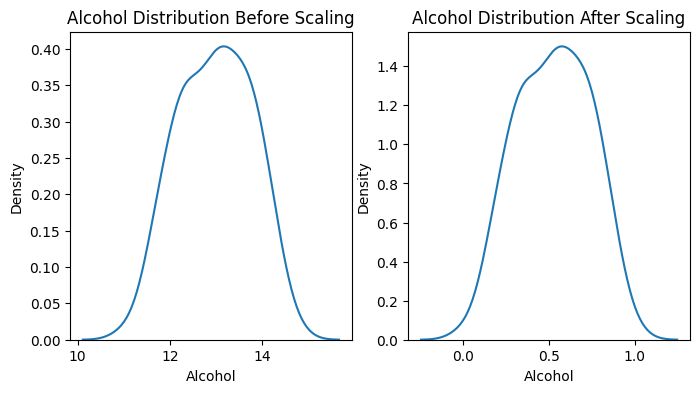

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

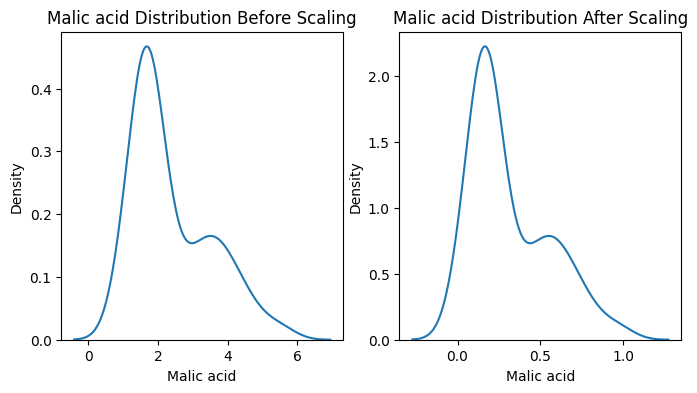

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()